# Google Colab 한글 폰트 설치

In [75]:
import sys

# Google Colab 환경에서 실행 중인지 확인
if 'google.colab' in sys.modules:
    # debconf를 Noninteractive 모드로 설정
    !echo 'debconf debconf/frontend select Noninteractive' | \
    debconf-set-selections

    # fonts-nanum 패키지를 설치
    !sudo apt-get -qq -y install fonts-nanum

    # Matplotlib의 폰트 매니저 가져오기
    import matplotlib.font_manager as fm

    # 나눔 폰트의 시스템 경로 찾기
    font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])

    # 찾은 각 나눔 폰트를 Matplotlib 폰트 매니저에 추가
    for fpath in font_files:
        fm.fontManager.addfont(fpath)

Selecting previously unselected package fonts-nanum.
(Reading database ... 123614 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [76]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'    #사용 방법1
plt.rc('font', family='NanumBarunGothic', size=11) #사용 방법2
print(plt.rcParams['font.family'], plt.rcParams['font.size'])   # 폰트확인

['NanumBarunGothic'] 11.0


## 테스트

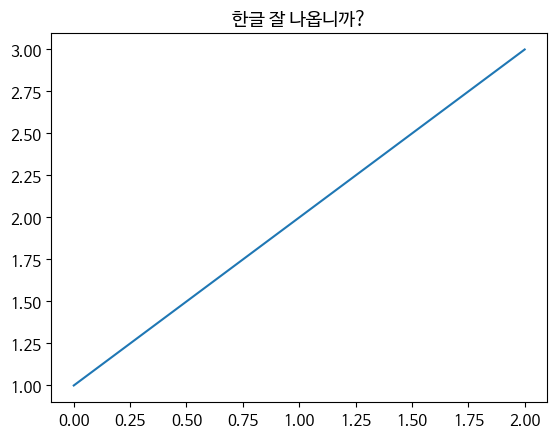

In [77]:
plt.plot([1, 2, 3])
plt.title("한글 잘 나옵니까?")
plt.show()

# 구글 Colab과 드라이브 연동

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


## 데이터 불러오기

In [101]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'

estate = pd.read_csv(DATA_PATH + "seoul_real_estate.csv")
estate.head(1)

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구


In [102]:
count_df = estate['SGG_NM'].value_counts()


,count
SGG_NM,
은평구,882
강서구,808
강동구,706
송파구,701
동대문구,550
구로구,513
노원구,511
양천구,502
강남구,489


# matplotlib

<ipython-input-4-810853db7938>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(dates, rotation=45)  # 날짜 레이블을 45도 회전


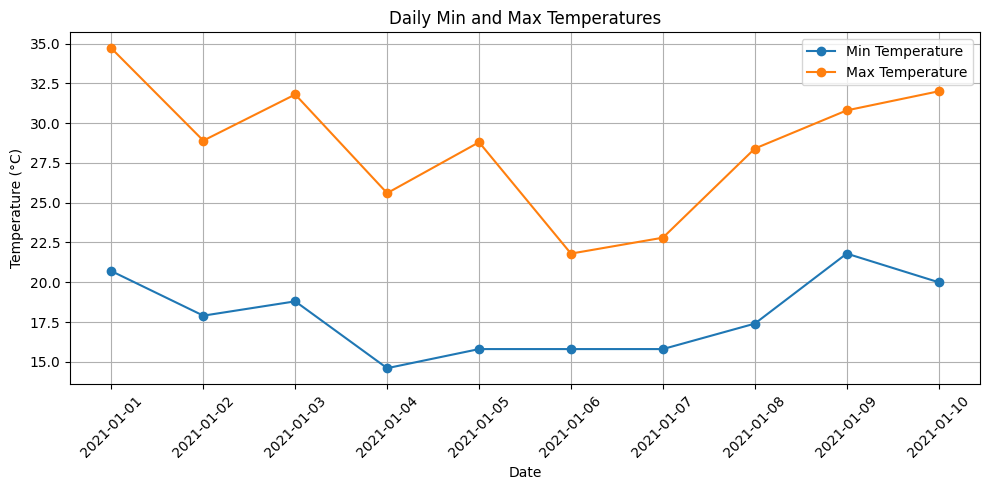

In [4]:
import matplotlib.pyplot as plt

# Data
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

# Figure와 Axes 객체 생성
fig, ax = plt.subplots(figsize=(10, 5))

# 최소 및 최대 온도 데이터 플롯
ax.plot(dates, min_temperature, label='Min Temperature', marker='o')
ax.plot(dates, max_temperature, label='Max Temperature', marker='o')

# Axes 객체의 설정
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title('Daily Min and Max Temperatures')
ax.set_xticklabels(dates, rotation=45)  # 날짜 레이블을 45도 회전
ax.grid(True)

# 범례 추가
ax.legend()

# 그래프 레이아웃 조정 및 표시
fig.tight_layout()
plt.show()


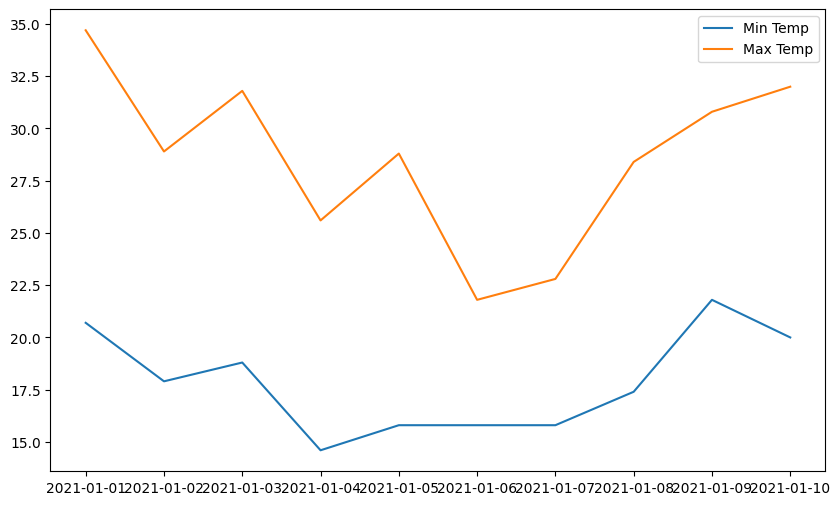

In [20]:
import matplotlib.pyplot as plt

# Data
dates = [
    '2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05',
    '2021-01-06', '2021-01-07', '2021-01-08', '2021-01-09', '2021-01-10'
]
min_temperature = [20.7, 17.9, 18.8, 14.6, 15.8, 15.8, 15.8, 17.4, 21.8, 20.0]
max_temperature = [34.7, 28.9, 31.8, 25.6, 28.8, 21.8, 22.8, 28.4, 30.8, 32.0]

fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10, 6))
ax.plot(dates, min_temperature, label = "Min Temp")
ax.plot(dates, max_temperature, label = "Max Temp")
ax.legend()
plt.show()

In [21]:
print(fig)
print(ax)

Figure(1000x600)
Axes(0.125,0.11;0.775x0.77)


# Yahoo API에서 무료 주식 데이터 가져오기

[*********************100%***********************]  1 of 1 completed


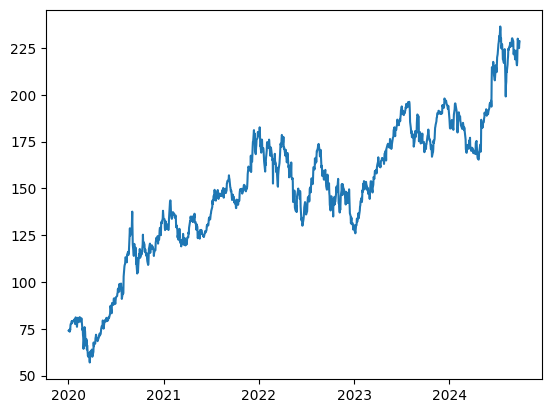

In [24]:
import yfinance as yf
data = yf.download("AAPL", start="2020-01-01", end = "2024-09-30")

fig, ax = plt.subplots()
ax.plot(data['Open'])

plt.show()

In [26]:
# x축은 Date가 현재 index
data['Open'].head(1)

,Open
Date,
2020-01-02,74.059998


In [30]:
data2 = data.copy()

data2 = data.reset_index()
data2.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


In [32]:
data3 = data2.set_index("Date")
data3.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


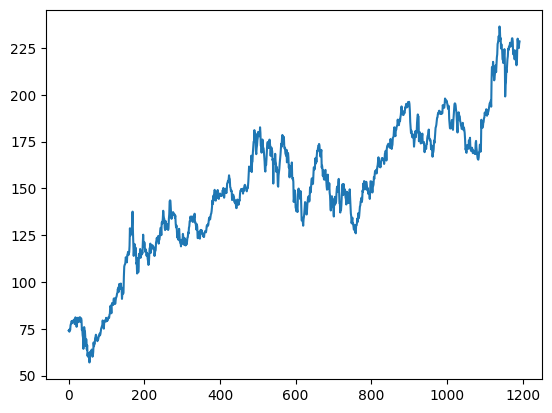

In [31]:
data2 = data.copy()

data2 = data.reset_index()
data2.head(1)

fig, ax = plt.subplots()
ax.plot(data2['Open'])

plt.show()

In [57]:
# AAPL 주식 , 엔비디아(NVDA) 주식 두개 불러와서
# 동시에 라인차트 그려보기

import yfinance as yf
apple = yf.download("AAPL", start="2020-01-01", end = "2024-09-30")
nvidia = yf.download("NVDA", start="2020-01-01", end = "2024-09-30")
intel = yf.download("INTC", start="2020-01-01", end = "2024-09-30")

apple.head(1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


In [35]:
nvidia.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.918,5.99775,5.973123,237536000


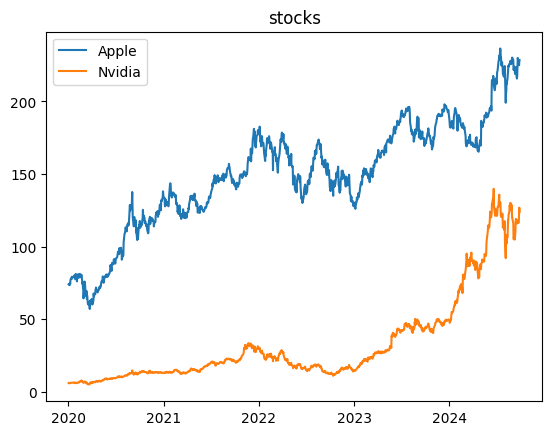

In [41]:
fig, ax = plt.subplots()

ax.plot(apple['Open'], label = "Apple")
ax.plot(nvidia['Open'], label = "Nvidia")
ax.set_title("stocks")
ax.legend()
plt.show()

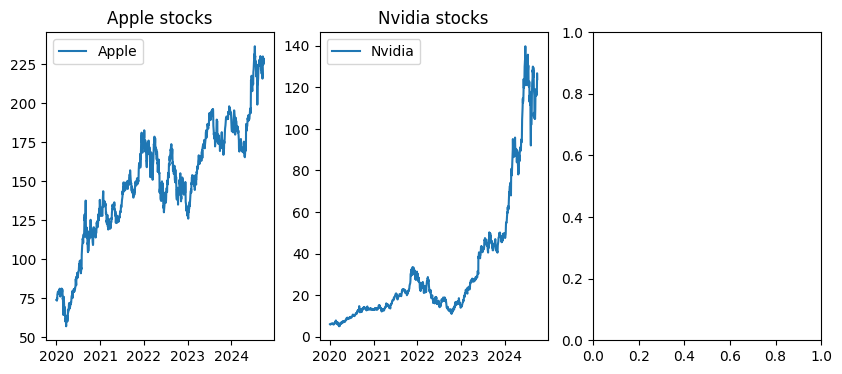

In [58]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10, 4))

ax[0].plot(apple['Open'], label = "Apple")
ax[1].plot(nvidia['Open'], label = "Nvidia")

ax[0].set_title("Apple stocks")
ax[1].set_title("Nvidia stocks")

ax[0].legend()
ax[1].legend()
plt.show()

In [ ]:
apple2 = apple.reset_index()
apple2.head(1)

apple is not defined

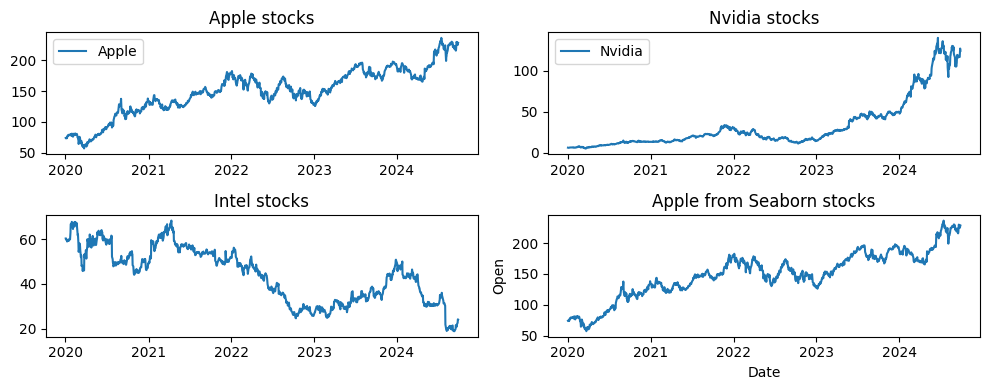

In [72]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 4))

ax[0, 0].plot(apple['Open'], label = "Apple")
ax[0, 1].plot(nvidia['Open'], label = "Nvidia")
ax[1, 0].plot(intel['Open'], label = "Intel")
sns.lineplot(data = apple2, x = 'Date', y = 'Open', ax = ax[1, 1])

ax[0, 0].set_title("Apple stocks")
ax[0, 1].set_title("Nvidia stocks")
ax[1, 0].set_title("Intel stocks")
ax[1, 1].set_title("Apple from Seaborn stocks")

ax[0, 0].legend()
ax[0, 1].legend()
fig.tight_layout()
plt.savefig("myStocks.png")
plt.show()

# Seaborn

In [65]:
import seaborn as sns

apple.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.167610,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,72.742645,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.400543,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,73.565201,132079200


In [69]:
apple2 = apple.reset_index()
apple2.head(1)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,72.876099,135480400


<Axes: xlabel='Date', ylabel='Open'>

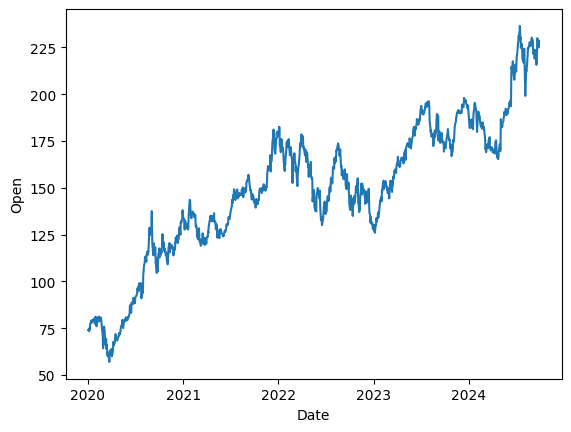

In [71]:
sns.lineplot(data = apple2, x = 'Date', y = 'Open')

# Matplotlib


## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : matplotlib.pyplot.bar
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.

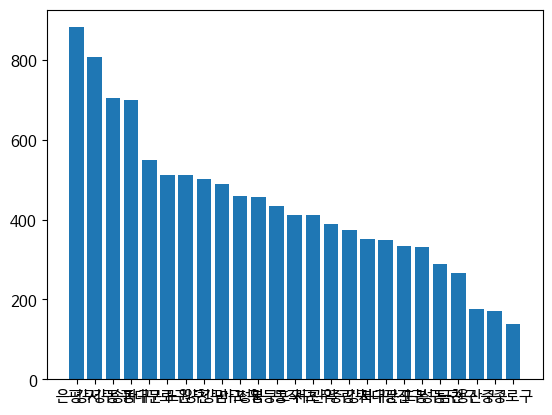

In [119]:
import matplotlib.pyplot as plt

# 데이터 수집
# estate = pd

# 데이터 가공
count_df = estate['SGG_NM'].value_counts()
자치구 = list(count_df.index)
건수 = list(count_df.values)

# 시각화
fig, ax = plt.subplots()
# ax.bar(자치구, 건수)
ax.bar(count_df.index, count_df.values)
plt.show()

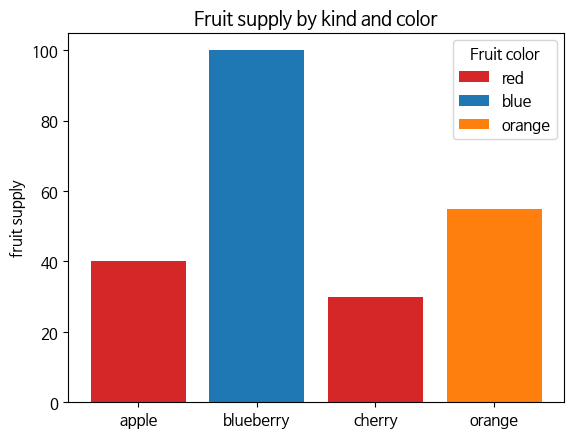

In [111]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = ['tab:red', 'tab:blue', 'tab:red', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

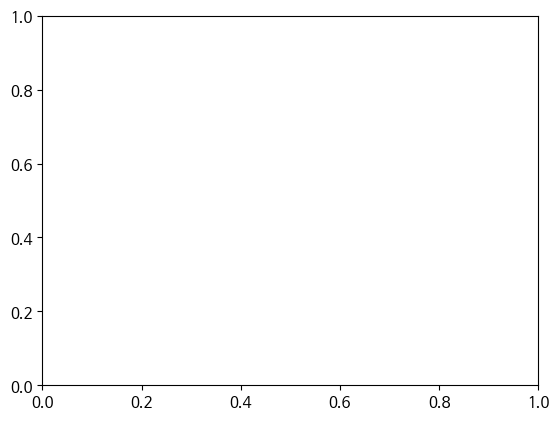

In [104]:
import matplotlib.pyplot as plt

# 자치구별 부동산 거래 건수 집계
sgg_count = estate['SGG_NM'].value_counts()

fig, ax = plt.subplots()

## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- matplotlib.pyplot.scatter

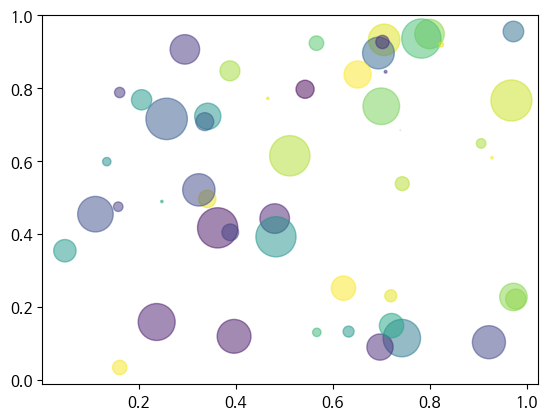

In [121]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

In [122]:
estate.head()

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
0,2023,11650,서초구,10800,서초동,1.0,대지,1328.0,11.0,대우도씨에빛2,...,38500,38.81,50.85,14.0,NaN,NaN,2005.0,오피스텔,중개거래,서울 서초구
1,2023,11620,관악구,10200,신림동,1.0,대지,1567.0,25.0,태성휴빌3차,...,17200,24.76,15.99,6.0,NaN,NaN,2015.0,연립다세대,직거래,NaN
2,2023,11530,구로구,10200,구로동,1.0,대지,44.0,8.0,비즈트위트 오렌지,...,12000,17.81,26.91,18.0,NaN,NaN,2013.0,오피스텔,직거래,NaN
3,2023,11410,서대문구,11800,홍은동,NaN,NaN,NaN,NaN,NaN,...,45000,39.67,142.00,0.0,NaN,NaN,1988.0,단독다가구,중개거래,서울 서대문구
4,2023,11380,은평구,11400,진관동,1.0,대지,100.0,3.0,아이파크 포레스트 게이트,...,14400,24.91,35.78,24.0,NaN,NaN,2013.0,오피스텔,중개거래,서울 은평구


In [131]:
estate.loc[estate['BLDG_AREA'] >= 900, :]

,ACC_YEAR,SGG_CD,SGG_NM,BJDONG_CD,BJDONG_NM,LAND_GBN,LAND_GBN_NM,BONBEON,BUBEON,BLDG_NM,...,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,RIGHT_GBN,CNTL_YMD,BUILD_YEAR,HOUSE_TYPE,REQ_GBN,RDEALER_LAWDNM
2796,2023,11620,관악구,10200,신림동,NaN,NaN,NaN,NaN,NaN,...,260000,1125.97,261.0,0.0,NaN,NaN,1998.0,단독다가구,중개거래,"서울 강북구, 서울 관악구"
4331,2023,11650,서초구,10100,방배동,NaN,NaN,NaN,NaN,NaN,...,690000,994.89,313.5,0.0,NaN,NaN,1992.0,단독다가구,중개거래,서울 서초구
10451,2023,11350,노원구,10500,상계동,NaN,NaN,NaN,NaN,NaN,...,545000,1664.83,329.0,0.0,NaN,NaN,2001.0,단독다가구,직거래,NaN


(2796     1125.97
 4331      994.89
 10451    1664.83
 Name: BLDG_AREA, dtype: float64,
 2796     260000
 4331     690000
 10451    545000
 Name: OBJ_AMT, dtype: int64)

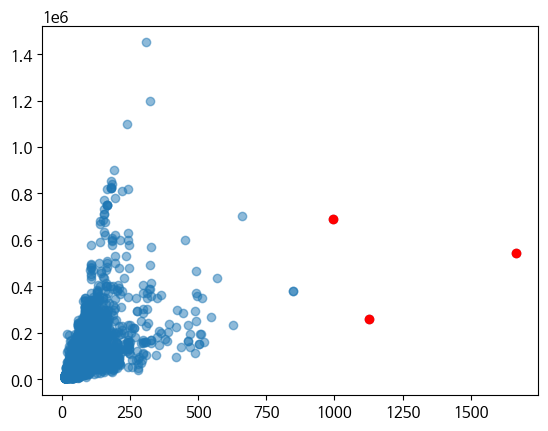

In [137]:
estate.loc[estate['BLDG_AREA'] >= 900, :]
highest_values = estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

# 새로운 플롯 시작
fig, ax = plt.subplots()
ax.scatter(estate['BLDG_AREA'], estate['OBJ_AMT'], alpha = 0.5)
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color = 'red')
plt.show()

# Seaborn

## 자치구별 부동산 거래 건수 비교 (Bar Chart)
- hint : seaborn.barplot
- SGG_NM을 기준으로 각 자치구별로 부동산 거래가 몇 건 이루어졌는지 bar 차트로 나타내세요.

In [142]:
sgg_count = estate['SGG_NM'].value_counts().reset_index()
sgg_count.columns = ['시군구', '거래건수']
sgg_count.head(1)

,시군구,거래건수
0,은평구,882


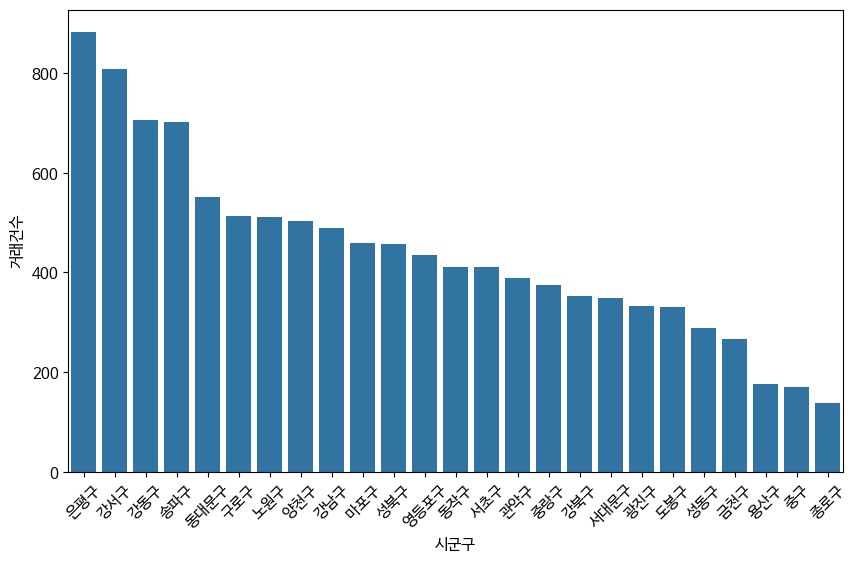

In [146]:
# 자치구별 부동산 거래 건수 집계
sgg_count = estate['SGG_NM'].value_counts().reset_index()
sgg_count.columns = ['시군구', '거래건수']

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(sgg_count, x="시군구", y="거래건수")
plt.xticks(rotation=45)
plt.show()

## 건물 면적 대비 거래 가격 관계
- BLDG_AREA와 OBJ_AMT 간의 관계를 산점도로 시각화하세요.
- sns.scatterplot

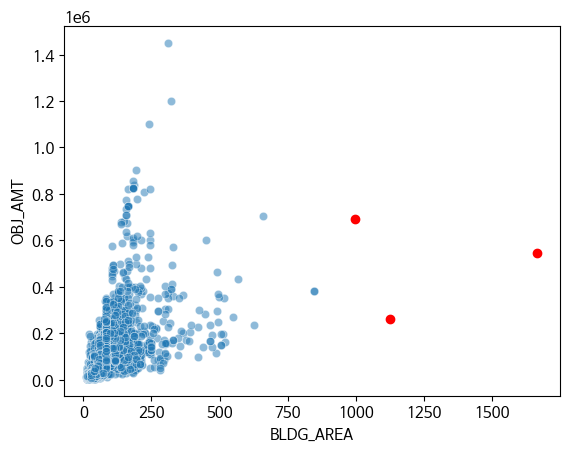

In [148]:
estate.loc[estate['BLDG_AREA'] >= 900, :]
highest_values = estate['BLDG_AREA'] >= 900
estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values]

fig, ax = plt.subplots()
# seaborn library
sns.scatterplot(data = estate, x = 'BLDG_AREA', y = 'OBJ_AMT', alpha = 0.5)

# matplotlib library
ax.scatter(estate['BLDG_AREA'][highest_values], estate['OBJ_AMT'][highest_values], color = 'red')
plt.show()